### Using Random Forest to predict rainfall

### What is our Objective ?
* To reliably predict next day's rainfall using possible derminants 

### Getting to know ourWeatherAus dataset! 

WeatherAus dataset contains about 10 years of daily weather observations from many locations across Australia it has the following features:

* Date - The date of observation
* Location - Location of the weather station
* MinTemp - Minimum temperature of the observed day in degree celsius
* MaxTemp - Maximum temperature of the observed day in degree celsius
* Rainfall - The amount of rainfall recorded for the day in mm
* Evaporation - Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine - The number of hours of bright sunshine in the day.
* WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am - Direction of the wind at 9am
* WindDir3pm - Direction of the wind at 3pm
* WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am - Humidity (percent) at 9am
* Humidity3pm - Humidity (percent) at 3pm
* Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many 
* Cloud3pm - Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many 
* Temp9am - Temperature (degrees C) at 9am
* Temp3pm - Temperature (degrees C) at 3pm
* RainToday -  if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow - The amount of next day rain in mm

In [1]:
import numpy as np
import pandas as pd
import mlpack
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weatherDf = pd.read_csv("weatherAUS.csv", parse_dates=["Date"])

In [3]:
weatherDf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
weatherDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [5]:
weatherDf.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
weatherDf.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
weatherDf = weatherDf.apply(lambda x: x.fillna(x.median()) if x.dtype == np.float64 else x.fillna(x.value_counts().index[0]))

In [8]:
weatherDf.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Data Imbalance

In [9]:
weatherDf.RainTomorrow.value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

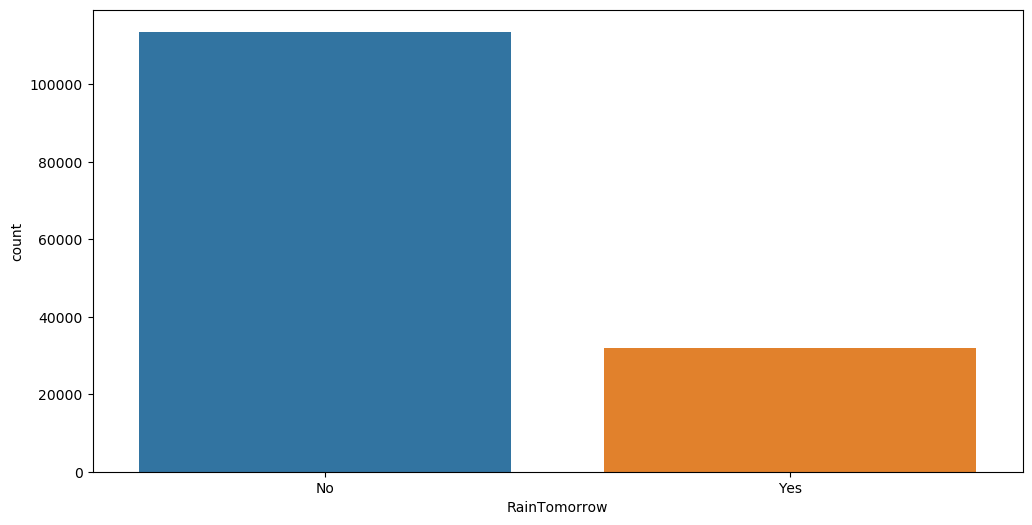

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x="RainTomorrow", data=weatherDf)
plt.show()

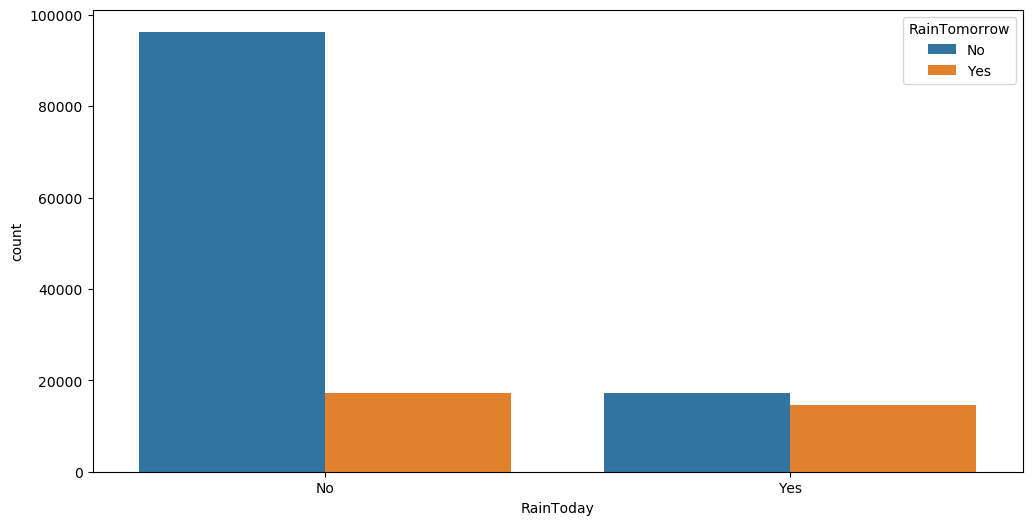

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x="RainToday", hue="RainTomorrow", data=weatherDf)
plt.show()

In [13]:
weatherDf['Year']=weatherDf.Date.dt.year

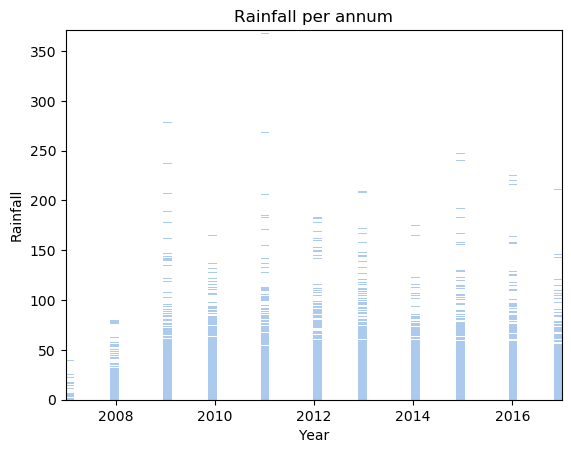

In [14]:
sns.histplot(x="Year", y="Rainfall", data=weatherDf)
plt.title("Rainfall per annum")
plt.show()

In [15]:
weatherDf["RainToday"], _ = pd.factorize(weatherDf.RainToday)
weatherDf["RainTomorrow"], _ = pd.factorize(weatherDf.RainTomorrow)

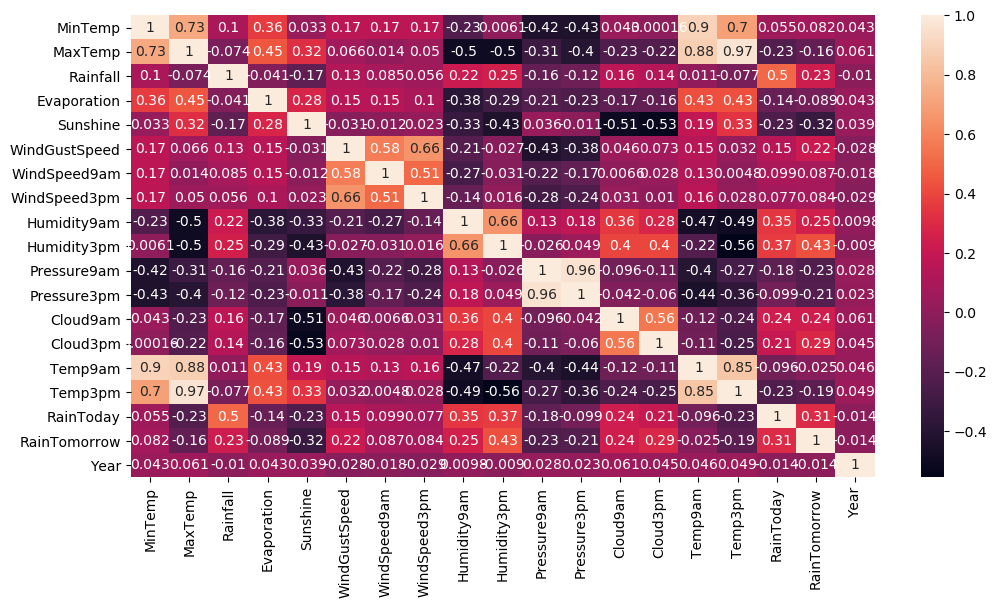

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(weatherDf.corr(), annot=True)
plt.show()

In [17]:
features=['Rainfall','Sunshine','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm','RainToday']

In [18]:
X=weatherDf[features]
y=weatherDf['RainTomorrow']

In [19]:
train_len = len(X)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.2 * train_len))
Xtest = X.iloc[:split, :].values
Xtrain = X.iloc[split:, :].values
ytest = y.iloc[:split].values
ytrain = y.iloc[split:].values

In [29]:
output = mlpack.random_forest(training=Xtrain, labels=ytrain, print_training_accuracy=True,
                             num_trees=100)

In [23]:
rf = output["output_model"]

In [24]:
predictions = mlpack.random_forest(input_model=rf, test=Xtest)

In [25]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

In [26]:
from sklearn.metrics import *

In [27]:
accuracy_score(ytest, yPreds)

0.8389247903203629

In [28]:
print(classification_report(ytest,yPreds))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22849
           1       0.71      0.43      0.53      6243

    accuracy                           0.84     29092
   macro avg       0.78      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092

